In [33]:
import pandas as pd
appl = pd.read_csv('C:/Users/User/Downloads/applications(2.0).csv')
indus = pd.read_csv('C:/Users/User/Downloads/industries(2.0).csv')

In [48]:
# Cleaning data
appl = appl.drop_duplicates(subset = 'applicant_id', keep='last') # Deleting duplicates
appl['Education level'] = appl['Education level'].fillna('Середня') # If field 'Education level' is empty, then it is filled as "Middle school education"
appl['External Rating'] = appl['External Rating'].fillna(0) # Filling absent values in the External rating column as 0
print(appl.columns)

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')


In [35]:
final = pd.merge(left = appl, right = indus, on ='Industry', how = 'left') #Adding the score of the industry to the appl table
final['Applied at'] = pd.to_datetime(
    final['Applied at'], 
    format= "mixed"
)



In [36]:
final.head(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15


In [49]:
def calculate_rating(row): #Calculating the rating of applications based on 8 conditions:
    if pd.isna(row['Amount']) or row['External Rating'] == 0: #If external rating is 0 or candidate have not added amount of money in credit application, rating is 0
        return 0

    rating = 0 
    if 35 <= row['Age'] <= 55: #If age is between 35 and 55 years, 20 points are added to the rating
        rating += 20
    if row['Applied at'].weekday() < 5:  # If the application was not submitted on a weekend, 20 points are added to the rating
        rating += 20
    if row['Marital status'] == 'Married': # If the applicant is married, 20 points are added to the rating
        rating += 20
    if row['Location'] in ['Київ чи область']: # If the applicant is located in Kyiv or the region, 10 points are added to the rating
        rating += 10
    rating += row['Score'] # Score of the industry is also added to the rating (and ranges from 0 to 20 points)
    if row['External Rating'] >= 7: # If external rating is greater than or equal to 7, 20 points are added to the rating
        rating += 20
    if row['External Rating'] <= 2: # IF external rating is less or equal to 2, 20 points are added to the rating 
        rating -= 20
    return max(0, min(100, rating))
final['Application Rating'] = final.apply(calculate_rating, axis=1)
final.head(10)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Application Rating
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,0
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,0
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65
5,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,35
6,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,35
7,2022-11-30 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15,35
8,2022-11-30 10:28:00,NaN,17,Чоловік,Інша,Married,2.0,Ще студент вишу,NaN,9c7a640dccb37d9f2164bac1deb0edfa,10,0
9,2022-11-30 10:28:03,18000.0,25,Чоловік,Dating,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,f8138219d5a95649cc85bdabeb3732ca,5,25


In [39]:
accepted_applications = final[final['Application Rating'] > 0] #Applications are accepted, if rating is more then 0
accepted_applications.head(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Application Rating
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65
5,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,35
6,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,35


In [46]:
accepted_applications['Week_Start'] = accepted_applications['Applied at'].dt.to_period('W-SUN').apply(lambda x: x.start_time)

week_table = accepted_applications.groupby('Week_Start', as_index=False).agg(applicant_count=('applicant_id', 'count'))
week_table.head(10) # Count of applications by each week 

,Week_Start,applicant_count
0,2022-11-28,3954
1,2022-12-05,3293
2,2022-12-12,2150
3,2022-12-19,1077
4,2022-12-26,1412
5,2023-01-02,664
6,2023-01-09,8


In [99]:
all = appl['applicant_id'].count() #How many applicants are selected to the next stage?
selected = accepted_applications['applicant_id'].count()
print(f"Count of all applicants - {all}. Count of selected applicants - {selected}")

Count of all applicants - 13278. Count of selected applicants - 12558


In [ ]:
top = accepted_applications[accepted_applications['Application Rating'] == 100].count() #How many applicants have the largest rating?
print(top)

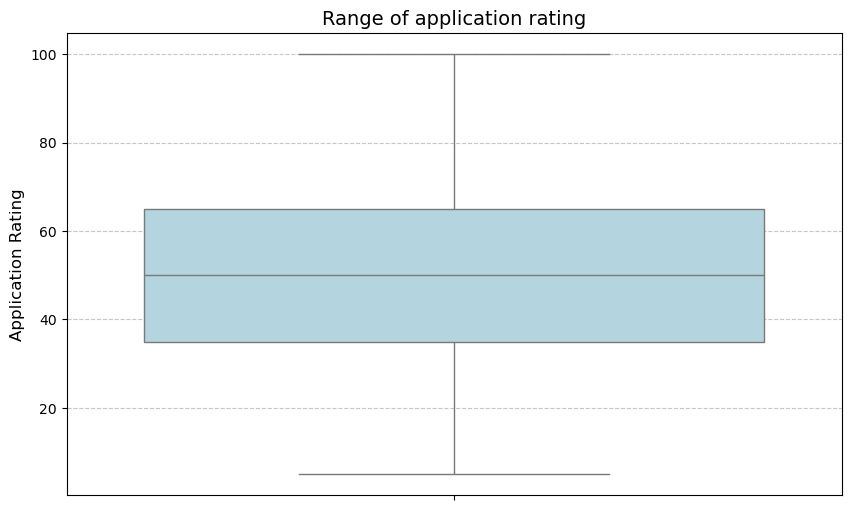

 Mean = 49.941471571906355, Median = 50.0, First quartile = 35.0, Third quartile = 65.0


In [50]:
import seaborn as sns         #What is a range of application rating?
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=accepted_applications, y='Application Rating', color='lightblue')

plt.title('Range of application rating', fontsize=14)
plt.ylabel('Application Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Mean = accepted_applications['Application Rating'].mean()
Median = accepted_applications['Application Rating'].median()
Quartile_3 = accepted_applications['Application Rating'].quantile(0.75)
Quartile_1 = accepted_applications['Application Rating'].quantile(0.25)
print(f" Mean = {Mean}, Median = {Median}, First quartile = {Quartile_1}, Third quartile = {Quartile_3}")

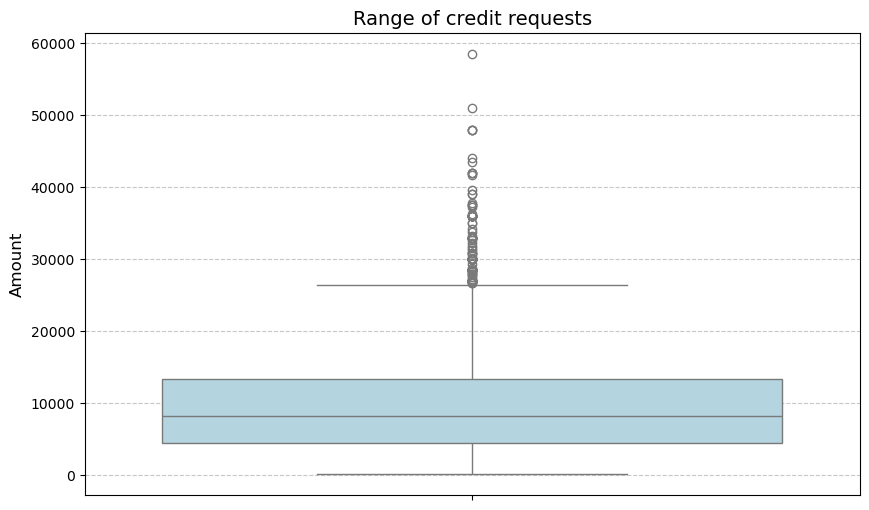

 Mean = 9301.403965599618, Median = 8250.0, First quartile = 4500.0, Third quartile = 13350.0, Minimum amount - 150.0, Maximum amount - 58500.0


In [93]:
plt.figure(figsize=(10, 6))    #Which amount of money are requested by applicants for?
sns.boxplot(data=accepted_applications, y='Amount', color='lightblue')

plt.title('Range of credit requests', fontsize=14)
plt.ylabel('Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Mean = accepted_applications['Amount'].mean()
Median = accepted_applications['Amount'].median()
Quartile_3 = accepted_applications['Amount'].quantile(0.75)
Quartile_1 = accepted_applications['Amount'].quantile(0.25)
Min = accepted_applications['Amount'].min()
Max = accepted_applications['Amount'].max()
print(f" Mean = {Mean}, Median = {Median}, First quartile = {Quartile_1}, Third quartile = {Quartile_3}, Minimum amount - {Min}, Maximum amount - {Max}")

In [59]:
Gen = accepted_applications.groupby(accepted_applications['Gender'])['applicant_id'].count() /accepted_applications['applicant_id'].count() * 100
print(Gen)  # What is gender of applicants?

Gender
Жінка      23.132664
Чоловік    76.867336
Name: applicant_id, dtype: float64


In [60]:
St = accepted_applications.groupby(accepted_applications['Marital status'])['applicant_id'].count() /accepted_applications['applicant_id'].count() * 100
print(St)  # What is marital status of applicants?

Marital status
Married    56.035993
Other       4.785794
Single     39.178213
Name: applicant_id, dtype: float64


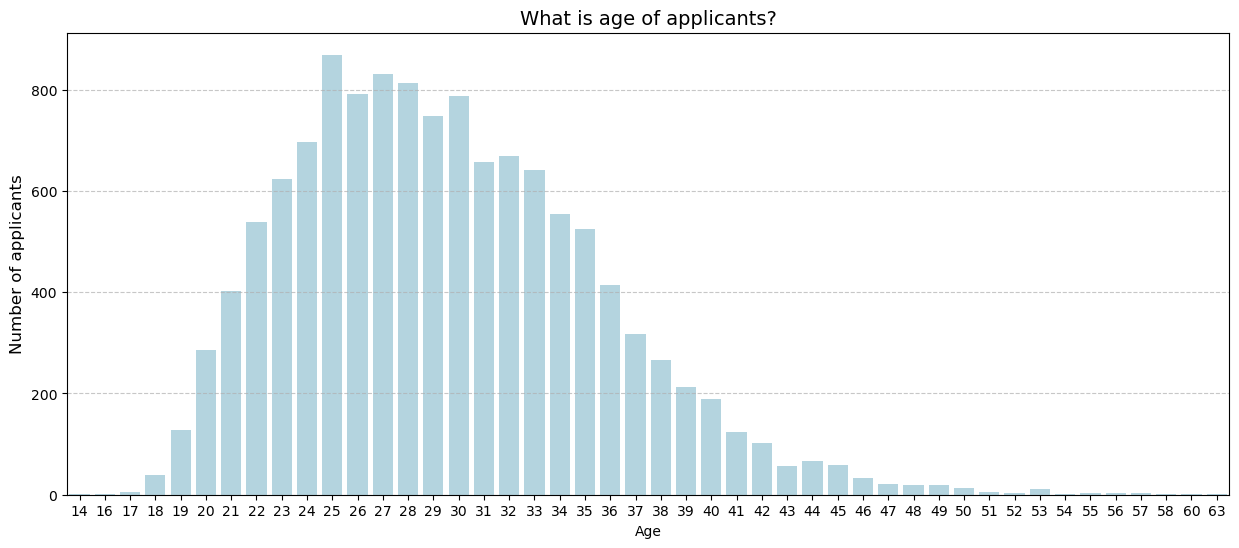

29.0 - median


In [95]:
Age = accepted_applications.groupby(accepted_applications['Age'])['applicant_id'].count()

plt.figure(figsize=(15, 6))
sns.barplot(x=Age.index, y=Age.values, color='lightblue')

plt.title('What is age of applicants?', fontsize=14)
plt.ylabel('Number of applicants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()   # What is age of applicants?

edian = accepted_applications['Age'].median()
mode = accepted_applications['Age'].median()
print (f"{edian} - median")

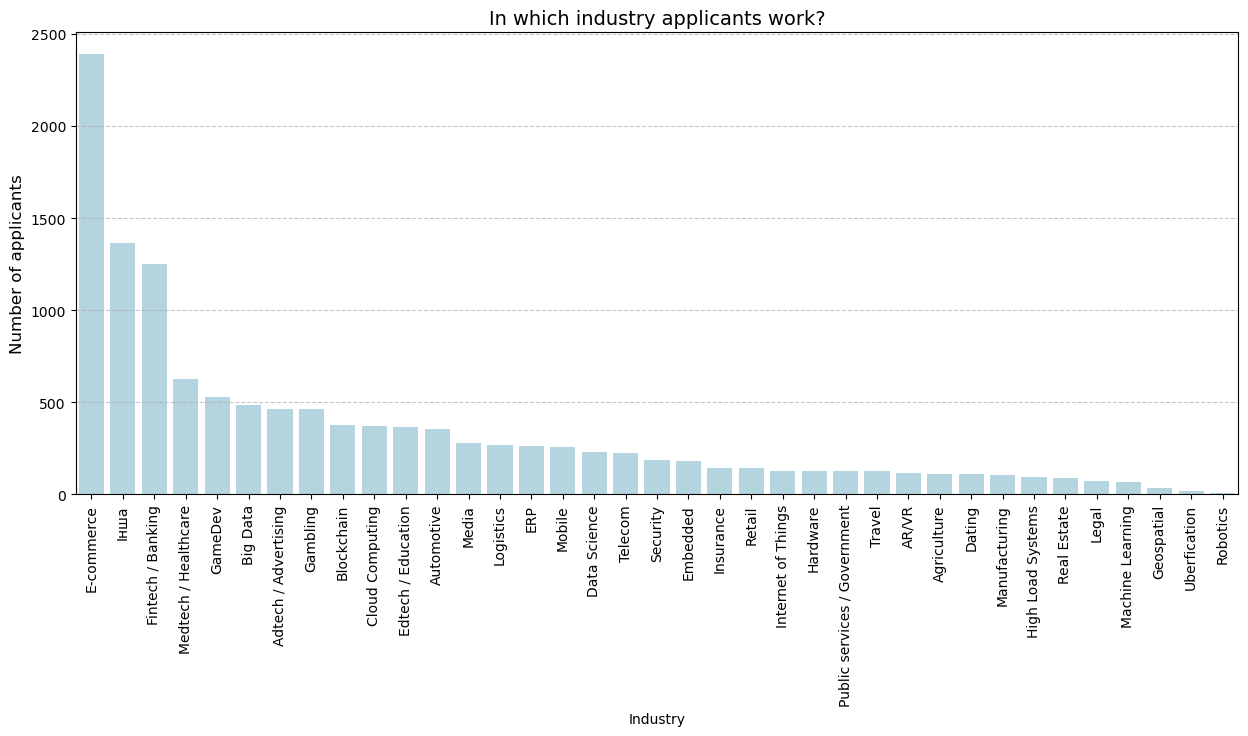

Industry
E-commerce                      2389
Інша                            1367
Fintech / Banking               1251
Medtech / Healthcare             628
GameDev                          527
Big Data                         485
Adtech / Advertising             464
Gambling                         462
Blockchain                       376
Cloud Computing                  374
Edtech / Education               367
Automotive                       357
Media                            281
Logistics                        268
ERP                              262
Mobile                           259
Data Science                     233
Telecom                          226
Security                         188
Embedded                         183
Insurance                        142
Retail                           142
Internet of Things               127
Hardware                         126
Public services / Government     126
Travel                           125
AR/VR                        

In [97]:
Industry = accepted_applications.groupby(accepted_applications['Industry'])['applicant_id'].count().sort_values(ascending = False)

plt.figure(figsize=(15, 6))
sns.barplot(x=Industry.index, y=Industry.values, color='lightblue')

plt.title('In which industry applicants work?', fontsize=14)
plt.ylabel('Number of applicants', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()  # In which industry applicants work?

print(Industry)

In [73]:
Education_level = accepted_applications.groupby(accepted_applications['Education level'])['applicant_id'].count() /accepted_applications['applicant_id'].count() * 100
print(Education_level)  # What is education level of applicants?

Education level
Вища (бакалавр, спеціаліст, магістр)    80.434783
Дві вищі                                 7.620640
Середня                                  3.655041
Середня спеціальна                       2.978181
Ще студент вишу                          5.311355
Name: applicant_id, dtype: float64


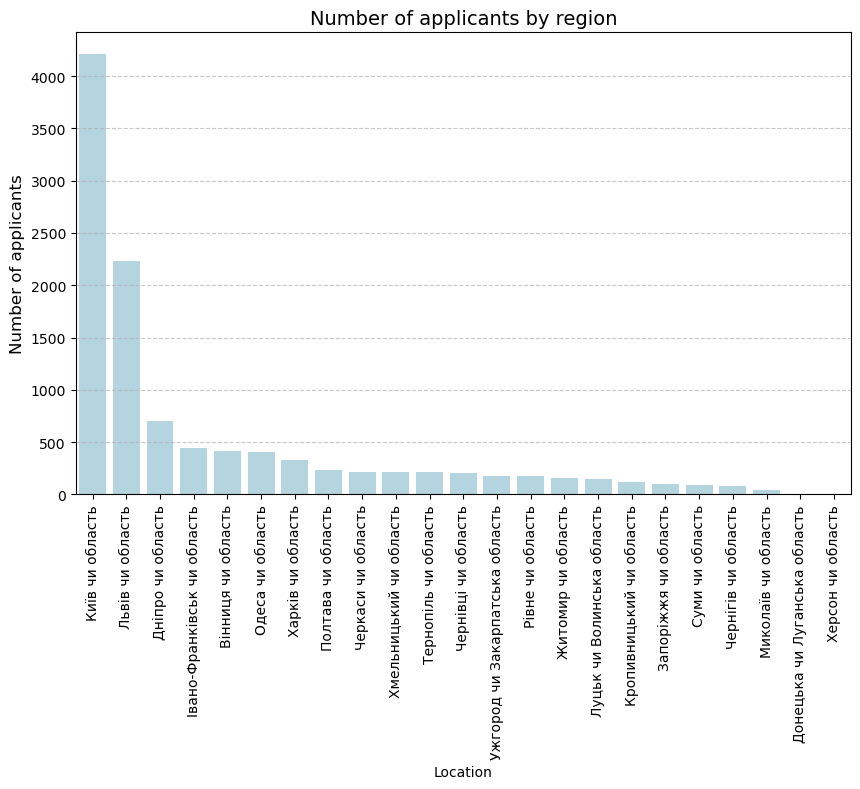

Location
Київ чи область                    4209
Львів чи область                   2229
Дніпро чи область                   706
Івано-Франківськ чи область         443
Вінниця чи область                  416
Одеса чи область                    405
Харків чи область                   332
Полтава чи область                  234
Черкаси чи область                  218
Хмельницький чи область             213
Тернопіль чи область                209
Чернівці чи область                 202
Ужгород чи Закарпатська область     173
Рівне чи область                    171
Житомир чи область                  158
Луцьк чи Волинська область          144
Кропивницький чи область            114
Запоріжжя чи область                 96
Суми чи область                      88
Чернігів чи область                  79
Миколаїв чи область                  44
Донецька чи Луганська область         6
Херсон чи область                     3
Name: applicant_id, dtype: int64


In [98]:
Location = accepted_applications.groupby(accepted_applications['Location'])['applicant_id'].count().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=Location.index, y=Location.values, color='lightblue')

plt.title('Number of applicants by region', fontsize=14)
plt.ylabel('Number of applicants', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()   # What is location of applicants?
print(Location)